In [1]:
import numpy as np
import rutinas as ru
import matplotlib.pyplot as plt
import pandas as pd

from scipy.linalg import solve, norm, eig, eigh
from scipy.optimize import curve_fit, root_scalar
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad


import plt_conf as conf 
conf.general()  # cargando configuración general

In [2]:
import multiprocessing as mul

## Método espectral

In [3]:
# Resolución de ecuaciones del fondo
nodos, ell = 0, 2

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell, Nptos=1500)  # no escalada #1500 2500

Finding a profile with  0 nodes
Maxima precisión alcanzada 0.10179680808153946 radio 23.18182101984913
masa  -11.037586744763619 Uf  -0.47613113462108214

E(U(inf))  -0.24080258567142668
energía =  -0.6770158742921232 $\lambda = $ 0.4529975328207514

Checking normalización,  0.999999994924954 1


In [4]:
# extendiendo soluciones
Ext = 500  # 1000
Np = 800 #1800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD, sD, dsD, uD, duD, Ext, Np)

checking  -1.6495944350186122 11.03758770796324 -0.00045378537486753627 -0.6770158742921232


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_78168/2979805571.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),


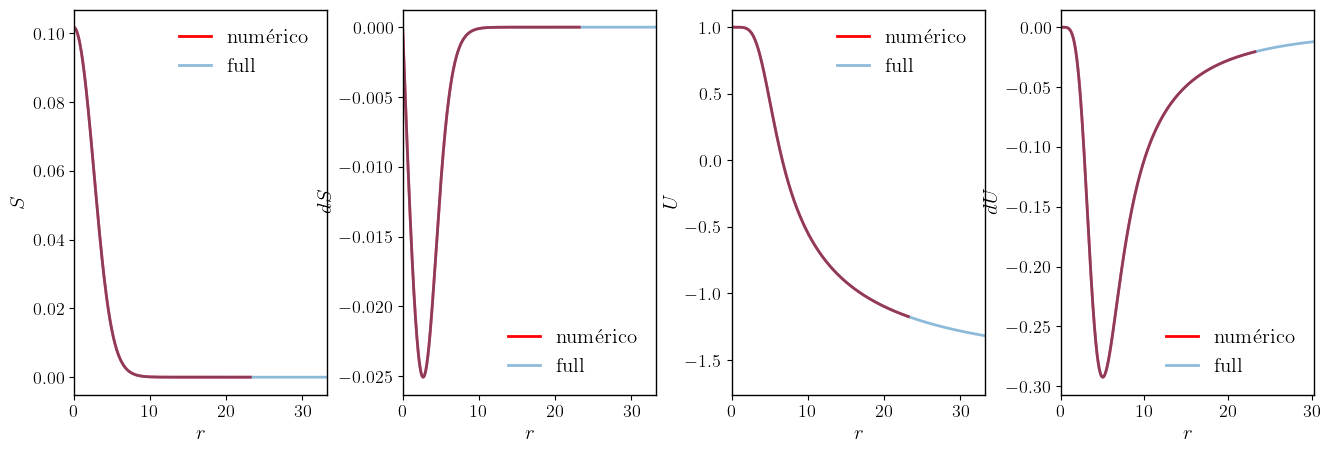

In [5]:
# graficando
yceros = np.zeros(len(cer0))
rad = np.linspace(rD[-1], rD[-1]+200, 1000)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(rD[:-1], sD[:-1], ls='-', c='red', label='numérico') 
#ax[0].plot(rad, sigm(rad, Ap, k), ls=':', c='red', label='extensión') 
ax[0].plot(rDnew, sDnew, ls='-', alpha=0.5, label='full') 
ax[0].plot(cer0, yceros, 'ko')

ax[0].set_xlim(rD[0], rD[-1]+10)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)
#ax[0].set_yscale('log')

ax[1].plot(rD[:-1], dsD[:-1], ls='-', c='red', label='numérico') 
#ax[1].plot(rad, dsigm(rad, Ap, k), ls=':', c='red',label='extensión') 
ax[1].plot(rDnew, dsDnew, ls='-', alpha=0.5, label='full') 

ax[1].set_xlim(rD[0], rD[-1]+10)
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(rD, uD, ls='-', c='red', label='numérico') 
#ax[2].plot(rad, Up(rad, AA, BB), ls=':', c='red',label='extensión')
ax[2].plot(rDnew, uDnew, ls='-', alpha=0.5, label='full') 

ax[2].set_xlim(rD[0], rD[-1]+10)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].plot(rD, duD, ls='-', c='red', label='numérico')  
#ax[3].plot(rad, dUp(rad, BB), ls=':',c='red', label='extensión') 
ax[3].plot(rDnew, duDnew, ls='-', alpha=0.5, label='full')

ax[3].set_xlim(rD[0], rD[-1]+7)
ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

In [6]:
# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')  # linear
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

Checking normalización, 1.0000007367135866 1
Checking convergencia de la Energía U(inf), U(asint) -0.6683573637204503 -0.6770158742921232


In [8]:
Nf = lambda x: x**2*fsN(x)**2
quad(Nf, xN[0], xN[-1])[0]

5.000003683567933

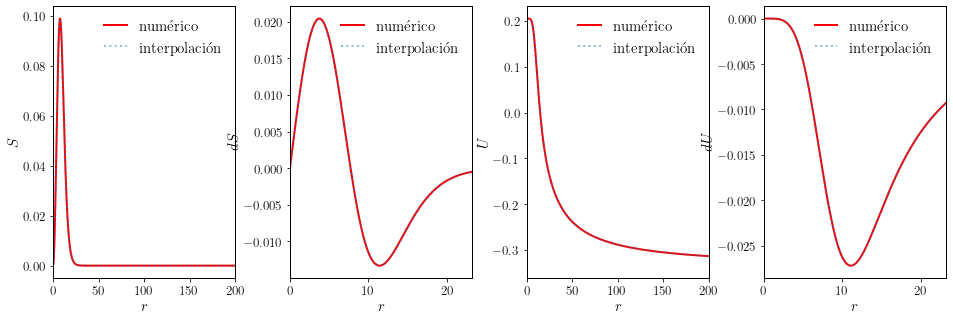

In [7]:
LL = 200*(nodos+1) #200
rad = np.linspace(0, rDnew[-1], 1000)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(xN, sN, ls='-', c='red', label='numérico') 
ax[0].plot(rad, fsN(rad), ls=':', alpha=0.5, label='interpolación') 

ax[0].set_xlim(0, LL)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)

ax[1].plot(xN, dsN, ls='-', c='red', label='numérico') 
ax[1].plot(rad, fdsN(rad), ls=':', alpha=0.5, label='interpolación') 

ax[1].set_xlim(0, rD[-1])
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(xN, uN, ls='-', c='red', label='numérico') 
ax[2].plot(rad, fuN(rad), ls=':', alpha=0.5, label='interpolación') 

ax[2].set_xlim(0, LL)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].set_xlim(0, rD[-1])
ax[3].plot(xN, duN, ls='-', c='red', label='numérico')  
ax[3].plot(rad, fduN(rad), ls=':', alpha=0.5, label='interpolación') 

ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

In [8]:
# saving for test with matlab codec
#np.savetxt('rN.dat', xN)
#np.savetxt('sN.dat', sN)
#np.savetxt('uN.dat', uN)

### Escalamiento en las derivadas

Como: $x_F=L(1+x_C)/2\quad\to\quad x_C=2x_F/L-1$ lo que va a implicar que el escalamiento en las derivadas tiene un factor de $L/2$ (solo se ha de derivar la relación), es decir $D_{[0,L]}=2D_{[-1,1]}/L \quad\to\quad D_{[-1,1]}=LD_{[0,L]}/2$.

## Estudiando Convergencia

In [8]:
%load_ext autoreload
%autoreload 2

import rutina_conv as rc

In [9]:
# convergencia variando L con N fijo

LLmin = 100  # 200
LLmax = 200*(nodos+1)+100
N = 100

Lval = np.logspace(np.log10(LLmin), np.log10(LLmax), 10)

colum_data = []
for i in Lval:
    lEnigF1, _, _, _ = ru.espectro(i, N, fsN, fuN, ell);
    
    jj = np.real(lEnigF1)!=0
    autoval = lEnigF1[jj]
    
    autoval = np.insert(autoval, 0, i, axis=None)
    
    colum_data.append(autoval)
    
# creando dataframe
datos_Autov = pd.DataFrame(colum_data) # , index=Lval

nameC = []
for colName in datos_Autov:
    if colName==0:
        nameC.append('L-value')
    else:
        nameC.append(colName)
    
datos_Autov.columns = nameC  # poniendo nuevos nombres
datos_Autov['L-value'] = abs(datos_Autov['L-value'])  # pasando la columna de L a reales

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  Tr

In [10]:
# Organizando los auto-valores
datos_Org = rc.Organ(datos_Autov, Rtol=3e-03, Atol=3e-04)

datos_Org

The referential row is   0


,L-value,1,2,3,4,5,6
0,100.000000,-0.009238+0.054711j,-0.009238-0.054711j,-0.000019+0.000000j,0.000019+0.000000j,0.009238-0.054711j,0.009238+0.054711j
1,119.581317,-0.009238+0.054711j,-0.009238-0.054711j,-0.000014-0.000000j,-0.000014-0.000000j,0.009238-0.054711j,0.009238+0.054711j
2,142.996915,-0.009238+0.054711j,-0.009238-0.054711j,-0.000019-0.000000j,-0.000019-0.000000j,0.009238-0.054711j,0.009238+0.054711j
3,170.997595,-0.009238+0.054711j,-0.009238-0.054711j,-0.000018+0.000000j,-0.000018+0.000000j,0.009238-0.054711j,0.009238+0.054711j
4,204.481177,-0.009238+0.054711j,-0.009238-0.054711j,-0.000019+0.000000j,-0.000019+0.000000j,0.009238-0.054711j,0.009238+0.054711j
5,244.521285,-0.009238+0.054711j,-0.009238-0.054711j,-0.000014+0.000000j,-0.000014+0.000000j,0.009238-0.054711j,0.009238+0.054711j
6,292.401774,-0.009238+0.054711j,-0.009238-0.054711j,-0.000013+0.000000j,-0.000013+0.000000j,0.009238-0.054711j,0.009238+0.054711j
7,349.657893,-0.009238+0.054711j,-0.009238-0.054711j,-0.000020-0.000000j,-0.000020-0.000000j,0.009238-0.054711j,0.009238+0.054711j
8,418.125515,-0.009238+0.054711j,-0.009238-0.054711j,-0.000014+0.000000j,-0.000014+0.000000j,0.009238-0.054711j,0.009238+0.054711j
9,500.000000,-0.009238+0.054711j,-0.009238-0.054711j,-0.000008+0.000000j,-0.000008+0.000000j,0.009238-0.054711j,0.009238+0.054711j


Text(0.5, 0.98, 'Convergencia de autovalor para  1 nodos con 100.0 puntos de Chebyshev')

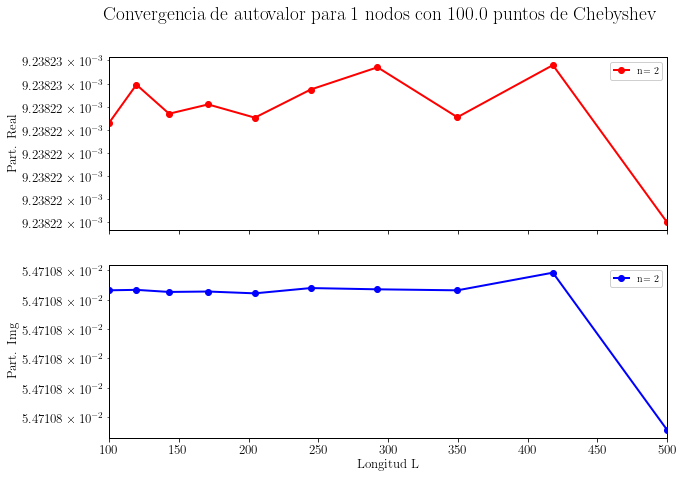

In [11]:
ii = 2
dR, dI = np.real(datos_Org[ii]), np.imag(datos_Org[ii])
L_valu = np.array(datos_Org['L-value'])

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(10,7),
                       gridspec_kw={'wspace':0.07, 'hspace':0.2})

ax[0].plot(L_valu, np.abs(dR), '-', marker='o', color = 'red', label = r'n=%2d'%ii)

ax[1].plot(L_valu, np.abs(dI), '-', marker='o', color = 'blue', label = r'n=%2d'%ii)

#ax[0].set_xlabel(r'Valor de L', fontsize=13)
ax[0].set_ylabel(r'Part. Real', fontsize=13)
ax[1].set_xlabel(r'Longitud L', fontsize=13)
ax[1].set_ylabel(r'Part. Img', fontsize=13)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_xlim([LLmin, LLmax])
#ax[1].set_xlim([0, 30])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=True, fontsize=10)
ax[1].legend(loc='best', frameon=True, fontsize=10)

fig.suptitle('Convergencia de autovalor para %2d nodos con %2.1f puntos de Chebyshev'%(nodos, N))

In [12]:
# convergencia variando N con LL fijo
LL = 200*(nodos+1)
Nmin = 100
Nmax = int(LL*3/4)+100
Nval = np.linspace(Nmin, Nmax, 10, dtype=np.int32)

colum_data = []
for i in Nval:
    lEnigF1, _, _, _ = ru.espectro(LL, i, fsN, fuN, ell)
    
    jj = np.real(lEnigF1)!=0
    autoval = lEnigF1[jj]
    
    autoval = np.insert(autoval, 0, i, axis=None)
    
    colum_data.append(autoval)

# creando dataframe
datos_Autov = pd.DataFrame(colum_data) # , index=Lval

nameC = []
for colName in datos_Autov:
    if colName==0:
        nameC.append('N-value')
    else:
        nameC.append(colName)
    
datos_Autov.columns = nameC  # poniendo nuevos nombres
datos_Autov['N-value'] = abs(datos_Autov['N-value'])  # pasando la columna de L a reales

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  Tr

Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [13]:
# Organizando los auto-valores
datos_Org = rc.Organ(datos_Autov, Rtol=1e-04, Atol=1e-05)
datos_Org

The referential row is   0


,N-value,1,2,3,4,5,6
0,100.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000018-0.000000j,0.000018-0.000000j,0.009238+0.054711j,0.009238-0.054711j
1,133.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000016+0.000000j,0.000016+0.000000j,0.009238+0.054711j,0.009238-0.054711j
2,166.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000018+0.000000j,0.000018+0.000000j,0.009238+0.054711j,0.009238-0.054711j
3,200.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000018-0.000000j,0.000018-0.000000j,0.009238+0.054711j,0.009238-0.054711j
4,233.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000016+0.000000j,0.000016+0.000000j,0.009238+0.054711j,0.009238-0.054711j
5,266.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000014+0.000000j,0.000014+0.000000j,0.009238+0.054711j,0.009238-0.054711j
6,300.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000017-0.000000j,0.000017-0.000000j,0.009238+0.054711j,0.009238-0.054711j
7,333.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000018-0.000000j,0.000018-0.000000j,0.009238+0.054711j,0.009238-0.054711j
8,366.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000019-0.000000j,0.000019-0.000000j,0.009238+0.054711j,0.009238-0.054711j
9,400.0,-0.009238-0.054711j,-0.009238+0.054711j,-0.000020+0.000000j,0.000020+0.000000j,0.009238+0.054711j,0.009238-0.054711j


Text(0.5, 0.98, 'Convergencia de autovalor para  1 nodos con longitud 400.0')

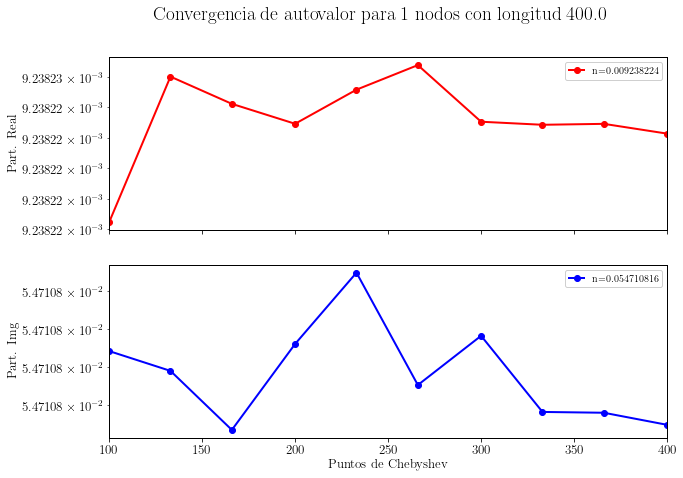

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(10,7),
                       gridspec_kw={'wspace':0.07, 'hspace':0.2})

indices = [1]

for ii in indices:
    dR, dI = np.real(datos_Org[ii]), np.imag(datos_Org[ii])
    N_valu = np.array(datos_Org['N-value'])

    ax[0].plot(N_valu, np.abs(dR), '-', marker='o', color = 'red', label = r'n=%2.9f'%(np.abs(dR[-1])))

    ax[1].plot(N_valu, np.abs(dI), '-', marker='o', color = 'blue', label = r'n=%2.9f'%(np.abs(dI[-1])))

#ax[0].set_xlabel(r'Valor de N', fontsize=13)
ax[0].set_ylabel(r'Part. Real', fontsize=13)
ax[1].set_xlabel(r'Puntos de Chebyshev', fontsize=13)
ax[1].set_ylabel(r'Part. Img', fontsize=13)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_xlim([Nmin, Nmax])
ax[1].set_xlim([Nmin, Nmax])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=True, fontsize=10)
ax[1].legend(loc='best', frameon=True, fontsize=10)

fig.suptitle('Convergencia de autovalor para %2d nodos con longitud %2.1f'%(nodos, LL))

## Autovalores

In [125]:
L = 200*(nodos+1)
N = int(L*3/4)
lEnigF1, lEnigT1, VF1, x1 = ru.espectro(L, N, fsN, fuN, ell)

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [126]:
#lEnigF1  # n = 1, l=2

In [127]:
jj = np.real(lEnigF1)!=0
autovec = VF1[:, jj]
autoval = lEnigF1[jj]

autoval#*lam**2

array([], dtype=complex128)

In [57]:
#print((autoval[-2]-(0.00051994798783+0.00225911281180j))/(0.00051994798783+0.00225911281180j)*100)
#print((autoval[-2]-(0.00039265148039+0.00504446459212j))/(0.00039265148039+0.00504446459212j)*100)

In [18]:
# autoval[-1]

(0.0033530024676192223+0.013991123660660904j)

## Autovectores

In [7]:
import pandas as pd

In [38]:
L = 250 #30000 #50/lamT
N = 100
lEnigF1, _, VF1, x1 = ru.espectro(L, N, fsN, fuN, ell)

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [19]:
# creando dataframe

jj = np.real(lEnigF1)!=0
autovec = VF1[:, jj]
autoval = lEnigF1[jj]

autoval#*lamT**2

array([-0.00454164+0.01963532j, -0.00454164-0.01963532j,
       -0.00202943-0.03598465j, -0.00202943+0.03598465j,
        0.00202943+0.03598465j,  0.00202943-0.03598465j,
        0.00454164-0.01963532j,  0.00454164+0.01963532j])

In [ ]:
array([-9.32968238e-06+2.03433272e-17j,  9.32968238e-06+2.03433272e-17j])

In [40]:
indic = [0, 1]#, 2, 3]  #[0, 1, 4, 5]  # [0, 1, 2, 3] 
datAVec = []
lisAVal = []
lisautoval = []
for ii in indic:
    Es0 = autovec[:, ii]
    A0, B0 = Es0[:(N-1)], Es0[(N-1):]
    A0 = np.insert(A0, [0, len(A0)], [0, 0], axis=None)
    B0 = np.insert(B0, [0, len(B0)], [0, 0], axis=None)
    datAVec.append(A0)
    datAVec.append(B0)
    
    lisAVal.append('{0.real:7.5f} + {0.imag:7.5f}i'.format(autoval[ii]))
    lisautoval.append(autoval[ii])

datAVec = np.array(datAVec).T

DatosVect = pd.DataFrame(datAVec, index=pd.Index(x1, name='Chev. ptos.'),
            columns=pd.MultiIndex.from_product([lisAVal,
                                                ['A', 'B']], names=['Autovalor:', 'Autovector:']))
DatosVect

Autovalor:          -0.00001 + 0.00000i                              \
Autovector:                           A                           B   
Chev. ptos.                                                           
 1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j   
 0.999507    6.711357e-14+4.746146e-09j -8.054389e-05+1.138941e-09j   
 0.998027    1.071558e-12+7.577857e-08j -1.286821e-03+1.819646e-08j   
 0.995562    5.382532e-12+3.806428e-07j -6.481959e-03+9.165898e-08j   
 0.992115    1.667389e-11+1.179146e-06j -2.023291e-02+2.861061e-07j   
...                                 ...                         ...   
-0.992115   -2.877248e-16+1.569067e-16j -4.164600e-13+5.879079e-18j   
-0.995562   -1.815151e-16-6.890213e-16j  1.919658e-12-2.715043e-17j   
-0.998027   -8.974225e-17+4.677495e-17j -1.231393e-13+1.738562e-18j   
-0.999507   -2.044774e-17-7.719703e-16j  2.138908e-12-3.024611e-17j   
-1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j   

Autovalor:           0.00001 + 0.00000i                              
Autovector:                           A                           B  
Chev. ptos.                                                          
 1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j  
 0.999507    6.711357e-14-4.746146e-09j -8.054389e-05-1.138941e-09j  
 0.998027    1.071558e-12-7.577857e-08j -1.286821e-03-1.819646e-08j  
 0.995562    5.382532e-12-3.806428e-07j -6.481959e-03-9.165898e-08j  
 0.992115    1.667389e-11-1.179146e-06j -2.023291e-02-2.861061e-07j  
...                                 ...                         ...  
-0.992115   -2.877248e-16-1.569067e-16j -4.164600e-13-5.879079e-18j  
-0.995562   -1.815151e-16+6.890213e-16j  1.919658e-12+2.715043e-17j  
-0.998027   -8.974225e-17-4.677495e-17j -1.231393e-13-1.738562e-18j  
-0.999507   -2.044774e-17+7.719703e-16j  2.138908e-12+3.024611e-17j  
-1.000000    0.000000e+00+0.000000e+00j  0.000000e+00+0.000000e+00j  

[101 rows x 4 columns]

In [41]:
# Asignando auto-vectores
def conv(elem):
    """ 
    """
    idx = pd.IndexSlice
    A = np.array(elem.loc[:, idx[:,'A']]).T[0]
    B = np.array(elem.loc[:,idx[:,'B']]).T[0]
    return A, B

# separando
nLam = 2#4
datos = [DatosVect[[lisAVal[i]]] for i in range(nLam)]
#[A1, B1], [A2, B2], [A3, B3], [A4, B4] = np.array(list(map(conv, datos)))
[A1, B1], [A2, B2] = np.array(list(map(conv, datos)))


# pasando a distancias reales
rad = np.array([(-x1[i]+1)*L/2. for i in range(N+1)])

#datos

<ipython-input-42-4e15ada3553c>:1: RuntimeWarning: invalid value encountered in true_divide
  datA = [A1/rad, A2/rad]#, A3/rad, A4/rad]
<ipython-input-42-4e15ada3553c>:2: RuntimeWarning: invalid value encountered in true_divide
  datB = [B1/rad, B2/rad]#, B3/rad, B4/rad]


Text(0.5, 0.98, 'Parte real Autovector')

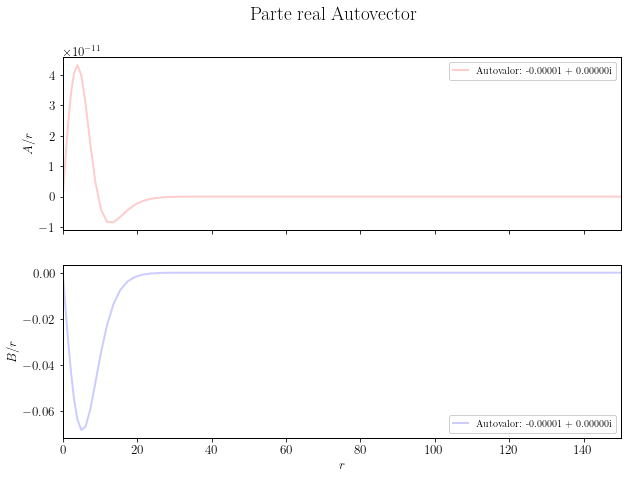

In [42]:
datA = [A1/rad, A2/rad]#, A3/rad, A4/rad]
datB = [B1/rad, B2/rad]#, B3/rad, B4/rad]

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(10,7),
                       gridspec_kw={'wspace':0.07, 'hspace':0.2})

for i in [0]:#range(1):
    
    ax[0].plot(rad, np.real(datA[i]), '-', color = 'red', alpha = abs(1/(5-i)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[i]))

    ax[1].plot(rad, np.real(datB[i]), '-', color = 'blue', alpha = abs(1/(5-i)),
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[i]))

    
#ax[0].set_xlabel(r'$r$', fontsize=13)
ax[0].set_ylabel(r'$A/r$', fontsize=13)
ax[1].set_xlabel(r'$r$', fontsize=13)
ax[1].set_ylabel(r'$B/r$', fontsize=13)

ax[0].set_xlim([0, 150])
ax[1].set_xlim([0, 150])
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=True, fontsize=10)
ax[1].legend(loc='best', frameon=True, fontsize=10)

fig.suptitle('Parte real Autovector')
